In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from IPython.display import display

groups = 7
heuristicvalues = []
id_values = []
labels = ('Random', 'MM_Open', 'MM_Center', 'MM_Improved', 'AB_Open', 'AB_Centered', 'AB_Improved')

index = np.arange(groups)
bar_width = 0.35

def plot_graph_tables(AB_I_values, heuristic_values, label):
    data = {'ID_Improved Agent Wins (Out of 10)': AB_I_values, 'Custom Agent Wins (Out of 10)': heuristic_values}
    dataframe = pd.DataFrame(data)
    display(dataframe)
    AB_values = AB_I_values
    custom_agent_values = heuristic_values
    plot.bar(index, AB_values, bar_width,
             color='b',
             label='AB_Improved Agent')

    plot.bar(index + bar_width, custom_agent_values, bar_width,
                     color='r', label = label)

    plot.xlabel('Agents')
    plot.ylabel('Wins (OUT OF 20)')
    plot.title('AB_Improved V/s Custom Agents')
    plot.xticks(index + bar_width / 2, labels)
    plot.rcParams["figure.figsize"] = [20, 5]
    plot.legend()
    plot.show()
    

In [9]:
# What are the Grid's Centrality Values ?
import math

def distance(game, move1, move2 = None):

    cx, cy = math.ceil((game.width-1) /2), math.ceil((game.height-1) /2)
    
    if move2:
        return (move1[0] - move2[0]) ** 2 + (move1[1] - move2[0]) ** 2
    else:
        return (move1[0] - cx) ** 2 + (move1[1] - cy) ** 2

from isolation import Board
newgame = Board(1,0)

allcells = newgame.get_blank_spaces()
centerdict = {}

for cell in allcells:
    #print (cell)
    newgame.apply_move(cell)
    ID = cell
    CNT = distance(newgame, cell)
    centerdict[ID] = CNT
    newgame = Board(1,0)

for x in range(0, newgame.height):
    for y in range(0, newgame.width):
        if (x,y) in centerdict.keys():
            print(" ", end = ' ')
            stringX = str(centerdict[(x,y)])
            if len(stringX) == 1:
                stringX = '0' + stringX
            print(stringX,end='   ')
    print("\n")

  18     13     10     09     10     13     18   

  13     08     05     04     05     08     13   

  10     05     02     01     02     05     10   

  09     04     01     00     01     04     09   

  10     05     02     01     02     05     10   

  13     08     05     04     05     08     13   

  18     13     10     09     10     13     18   



In [5]:
directions = {
            (-1, -1): [(-1, 2), (2, -1)], # top left
            (1, -1): [(1, 2), (-2, 1)],  # top right
            (-1, 1): [(-1, -2), (1, 2)],  # bottom left
            (1, 1): [(-1, 2), (1, -2)]     # bottom right
            }

for keys, values in directions.items():
    print(keys,"<-X-X->",values)

(-1, -1) <-X-X-> [(-1, 2), (2, -1)]
(1, -1) <-X-X-> [(1, 2), (-2, 1)]
(-1, 1) <-X-X-> [(-1, -2), (1, 2)]
(1, 1) <-X-X-> [(-1, 2), (1, -2)]


,Custom Agent Wins (Out of 10),ID_Improved Agent Wins (Out of 10)
0,10,10
1,8,9
2,10,10
3,9,9
4,4,5
5,8,7
6,5,6


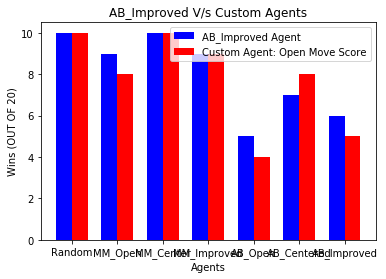

In [6]:
#1st Trial

AB_improved_values = [10, 9, 10, 9, 5, 7, 6]
heuristic_1_values = [10, 8, 10, 9, 4, 8, 5]
label = 'Custom Agent: Open Move Score'
plot_graph_tables(AB_improved_values, heuristic_1_values, label)

In [10]:
# Bottoms Up
# Using Iterative Blocking to see how safe moves in cells are.
# Moves Safety (Living to die another day)
import math, numpy
import pandas
from isolation import Board

def num_applymoves(cell):
    newgame = Board(1,0)
    newgame.apply_move(cell)
    playermoves  = newgame.get_legal_moves()
    vectors = ((-2, -1), (-2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2), (2, -1), (2, 1))
    nextmovescore = len([(cell[0] + ray_[0], cell[1] + ray_[1])
                    for ray_ in vectors if (cell[0] + ray_[0], cell[1] + ray_[1]) in playermoves ])
    return nextmovescore

newgame = Board(1,0)
allcells = newgame.get_blank_spaces()
movesdict = {}

for cell in allcells:
    #print (cell)
    ID = cell
    COUNT = num_applymoves(cell)
    movesdict[ID] = COUNT
    newgame = Board(1,0)

for x in range(0, newgame.height):
    for y in range(0, newgame.width):
        if (x,y) in movesdict.keys():
            print(' ', end = ' ')
            stringX = str(movesdict[(x,y)])
            if len(stringX) == 1:
                stringX = '0' + stringX
            print(stringX,end='   ')
    print("\n")
        

  02     03     04     04     04     03     02   

  03     04     06     06     06     04     03   

  04     06     08     08     08     06     04   

  04     06     08     08     08     06     04   

  04     06     08     08     08     06     04   

  03     04     06     06     06     04     03   

  02     03     04     04     04     03     02   



In [11]:
#creating a composit heuristic: early game to end game
#minimizing openmoves: not a priority, good thing if it happens! --> critical
#centrality: medium priority --> medium priority (openmoves, kind of does this)
#chase: no priority --> high/strict priority or vice-versa

#logic
#chase --> distance to opponent is less than 1 or 2 game moves worth of length
#chase --> map(distance: player location, opponent location) <= one / half * size(quadrant)
#chase --> quadrant distance located near or far from centre

#centrality --> distance (centre, move) 4 maximas along diagonals, 4 minimas along orthogonal
#centrality --> maximise without compromising moves, minimise without too

#moves --> len(pmoves)-(omoves)*num, agressive: num >= 1, relaxed: num <= 1

#code:
#default vars
game = Board('Zer0', 'Her0')
game.apply_move((0,0))
game.apply_move((1,1))
ownloc = game.get_player_location(player)
opploc = game.get_player_location(game.get_opponent(player))
ownmoves = game.get_legal_moves(player)
oppmoves  = game.get_legal_moves(game.get_opponent(player))


#centrality
score_distance = distance(game, ownloc)
score_oppdistance = distance(game, opploc)
#centrality of next moves
score_dist_ownmoves = sum([distance(game, moves) for moves in ownmoves])
score_dist_oppmoves = sum([distance(game, moves) for moves in ownmoves])

#chase : 2 moves of (2,1) apart at max ? ~ 9 + 9 or 16, 4
score_chase = 1 / max(18, distance(game, ownloc, opploc))

#moves difference
score_om = len(ownmoves) - len(oppmoves)
#
weight  = 8.0 / len(game.get_blank_spaces())
score_om_weighted = len(ownmoves) - len(oppmoves) * weight
#
ownmovescore = float(sum([movesdict[move] for move in ownmoves]) / (len(ownmoves) + 1))
oppmovescore = float(sum([movesdict[move] for move in oppmoves]) / (len(oppmoves) + 1))

NameError: name 'player' is not defined